In [1]:
# if os.name != 'posix':
#     %matplotlib ipympl
# else:
#     %matplotlib notebook
import scipy.constants as sc
from scipy.optimize import fsolve

import numpy as np
import cmath
import matplotlib.pyplot as plt
# plt.rcParams.update({
#     "text.usetex": True,
#     'text.latex.preamble': r"\usepackage{amsmath} \boldmath"
# })
import os
import h5py

print(os.getpid())
%cd ../../

import pylib.mix as mix
import pylib.measurement as mse

8112
/media/work/docs/codes/QuCF/scripts-py


In [2]:
# --- Launch to change cells' width ---
from IPython.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))

colors_ = ["blue", "red", "green", "gray", "black"]

from matplotlib import ticker
cmap_two_signs_= 'coolwarm'
cmap_two_signs_= 'Blues'
def fmt_(x, pos):
    a, b = '{:.2e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)

for i in range(30):
    plt.close()

In [78]:
# --- Paths ---
path_data_ = "../QuCF/tests/test_QETU_Gauss/"
pr_name_ = "qetu"

# --- Global parameters ---
nx_ = 10
Nx_ = 1 << nx_

# for QETU:
x_min_ = 0.0
x_max_ = np.pi

# # for QSVT:
# x_min_ = -1.0
# x_max_ = 1.0

t_ = 2.0

Reading the file ../QuCF/tests/test_QETU_Gauss//qetu_OUTPUT.hdf5...
Name of the simulation is qetu
Simulation has been performed  01-26-2024 12:18:53

QC prob.: 4.418e-02


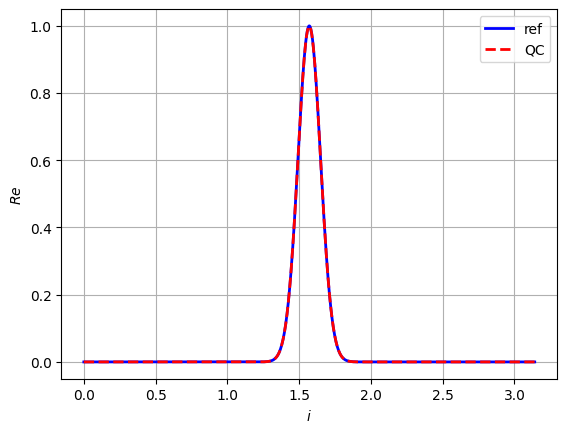

In [79]:
# -----------------------------------------------------------
# --- Read results from QuCF simulations ---
# -----------------------------------------------------------
mix.reload_module(mse)


om = mse.MeasOracle__(True)

om.path_  = path_data_
om.pname_ = pr_name_
om.open()
om.set_zero_ancillae_work_states(0)
qc_data_full = om.get_var_x({}, "rx")

print()
print("QC prob.: {:0.3e}".format(np.sum( np.abs(qc_data_full)**2 ) ))

# --- x-grid ---
x = np.linspace(x_min_, x_max_, Nx_)

# --- reference data ---

# ref_data = np.exp(-1.j * t_ * x)


# --- for QETU ---
om.read_qsvt()
y    = np.cos(t_ * x / 2.)
par1 = om.dd_["qetu_data"]["par"]

# # --- for QSVT ---
# om.read_qsvt()
# y    = np.sin(x)
# par1 = om.dd_["qetu_data"]["par"]


ref_data = np.exp(- np.arcsin(y)**2 / (2 * par1**2))
# ref_data /= np.sqrt( np.sum( np.abs(ref_data)**2 ) )

# --- QuCF data ---
qc_data = -np.array(qc_data_full.real)
qc_data *= 2**(nx_/2.)
# qc_data /= np.sqrt( np.sum( np.abs(qc_data)**2 ) )


# --- Plotting ---
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(
    x, ref_data.real, 
    color='b', linewidth = 2, linestyle='-',  
    label = "ref"
)
ax.plot(
    x, qc_data,
    color='r', linewidth = 2, linestyle='--',  
    label = "QC"
)
plt.xlabel('$i$')
plt.ylabel("$Re$")
ax.legend()
plt.grid(True)
plt.show()

In [ ]:
par1*2/pi,   prob-QETU,      par1/Lx      prob-QSVT
0.05:        4.418e-02  0.025             6.940e-02
0.1:         8.854e-02, 0.05              1.391e-01
0.2:         1.771e-01, 0.1               2.781e-01
0.4:         3.533e-01, 0.2               5.417e-01

In [11]:
np.sqrt( np.sum( np.abs(ref_data)**2 ) )

32.0

In [63]:
par1 / (x_max_ - x_min_)

0.2